> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This kernell is tried to focus on (No Show up patient) problem in Vitoria the capital city of Espirito Santo State-Brazil, which the patient set his appointment then he/she don't show up!! so I conducted a quick analysis to identfy what cause this problem and try to get an insight on what factors might influence the pacient to miss his appointment. 

first I will load the necessary packages for this analysis.
    

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

Now in this step, I will prepare the data for the analysis by checking if there is missing values or invalid values.

### General Properties

Detterminate the dimension of the Dataset .So, we have 14 columns and 110527 rows.

In [2]:
#Dimensions of the Dataset
df.shape

(110527, 14)

In [3]:
 ## take a sample of dataset.
display(df.head(5)) 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I take a sample of dataset useing head.We can clearly see the name of the columns and what they contain.

In [4]:
 ## take a sample of dataset. 
display(df.tail(5)) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


I use tail to see the last 5 rows of the dataset

In [5]:
#informations of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



Good, there are no missing values!! now I will classify the variables into four groups patient information, appointment information, health situation and the general information, I think this will help me in data preparation process.

1- Patient Information

PatientId

Gender

Age

I will ignore Patient Id as I think it has no importance in our analysis. Now let check the values of Gender and Age:


In [6]:
# delete the patient Id 
del df["PatientId"]
# check the values of the rest of patient information group.
print ("Gender:{}".format(list(set (df["Gender"])))) 
print ("Age : {}".format(list(set(df["Age"]))))

Gender:['M', 'F']
Age : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1]


There are tow values for gender M = male and F= Female so no need to perform any cleaning or auditing process, but in the Age variable We can see strang values for some patients like 100 and above and negative values, I wonder if the negative values mean baby before born or it may come from a typo error however as I'm not sure about this value I will delete it, also I check in the geoba.se and I found the average of life expectancy in Brazil is about 74.06 and there are just 4,388 people have age 100 and above so I will choose to delete patients who have age in this range.In addition we will classify the patient according to their age to child, adult and senior.

In [7]:
 df = df[(df["Age"] < 100) & (df["Age"]>0)] 

In [8]:
def FormatAge (age):
    if age['Age']>0 and age['Age']<=17 :
        return 'Child'
    elif age['Age']>=18 and age['Age'] <50:
        return 'Adult'
    else:
        return 'Senior'


In [9]:
df['AgeClass'] = df.apply(FormatAge,axis=1)

2- Appointment Information

AppointmentID

ScheduledDay

AppointmentDay

for the group of Appointment Information, I will remove the AppointmentID from our dataset and reformate the ScheduledDay, in addition, i will create a new variable WaitingDay which mean the duration between the scheduled date and the appointment date.



In [10]:
 # AppointmentID 
df.head()


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AgeClass
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Senior
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Senior


In [11]:
 # Reformatting the Scheduled Date and Appointment Day 
def AppointmentFormat(df):  
    df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], format="%Y/%m/%d %H:%M:%S")
    df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"], format="%Y/%m/%d %H:%M:%S") 
    df["Scheduledyear"]= df["ScheduledDay"].dt.year 
    df["Scheduledmonth"]= df["ScheduledDay"].dt.month   
    df["Scheduledweek"]= df["ScheduledDay"].dt.weekday   
    df["Scheduledhour"]= df["ScheduledDay"].dt.hour 
# Appointment Day Reformatting and create additional col 
    df["Appointmentyear"]= df["AppointmentDay"].dt.year  
    df["Appointmentmonth"]= df["AppointmentDay"].dt.month   
    df["Appointmentweek"]= df["AppointmentDay"].dt.weekday 
    df['WaitingDay']=np.where(df.ScheduledDay.dt.date==df.AppointmentDay.dt.date, 0, df.AppointmentDay.sub(df.ScheduledDay))

    
AppointmentFormat(df) 

3.Health Situation

Hypertension

Diabetes

Alcoholism

Handcap


In [12]:
#Dimensions of the Dataset
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,...,No-show,AgeClass,Scheduledyear,Scheduledmonth,Scheduledweek,Scheduledhour,Appointmentyear,Appointmentmonth,Appointmentweek,WaitingDay
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,...,No,Senior,2016,4,4,18,2016,4,4,0 days
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,...,No,Senior,2016,4,4,16,2016,4,4,0 days
2,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,...,No,Senior,2016,4,4,16,2016,4,4,0 days
3,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,...,No,Child,2016,4,4,17,2016,4,4,0 days
4,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,...,No,Senior,2016,4,4,16,2016,4,4,0 days


In [13]:
 # correcte the misspiling for Hipertension clumane
df = df.rename(columns = {'Hipertension':'Hypertension'}) 

In [14]:
#chek the valus of varibles. 
print ("Hypertension:{}".format(list(set (df["Hypertension"])))) 
print ("Diabetes : {}".format(list(set(df["Diabetes"])))) 
print ("Alcoholism:{}".format(list(set(df["Alcoholism"])))) 
print ("Handcap : {}".format(list(set(df["Handcap"]))))

Hypertension:[0, 1]
Diabetes : [0, 1]
Alcoholism:[0, 1]
Handcap : [0, 1, 2, 3, 4]


4- Genral Infomation

SMS_received

No-show

Neighbourhood

Scholarship


In [15]:
#Dimensions of the Dataset
(df.shape) 

(106976, 22)

In [16]:
#delete AppointnebtID
del df["AppointmentID"] 

In [17]:
#Dimensions of the Dataset
(df.shape) 

(106976, 21)

ok, we start with 14 varibles and now we end up with 21 varibles,I think the data seems to be clean enughe and valied to start the analysis.

## Data Analysis:
    
### first let see How many patient attende thier appointment .
  

In [18]:
#I use groupby to see how many yes and we have for the No-sow column 

print (df.groupby("No-show").size()) 
groupInfo = df.groupby("No-show")

# and now I compute the procentage values
total = 85299 + 21672
yes_procentage = (85299.0 * 100.0) / total
no_procentage = (21672.0 * 100.0) / total
print ("show procentage = ", yes_procentage)
print ("no procentage = ", no_procentage)

No-show
No     85299
Yes    21677
dtype: int64
show procentage =  79.74030344672855
no procentage =  20.259696553271446


20.26%) of the Patients not attend the appointment and approximately (79.74%) of them came to their appointment, so we will try to go deeper in the data and identify how each features play roles in this problem.

### How the Patient gender play role in this analysis??

In [19]:
#now we will see how many femele and man are there 
print('Distribution of Gender')
print(df.groupby(['Gender']).Gender.count())

Distribution of Gender
Gender
F    70109
M    36867
Name: Gender, dtype: int64


How the Patient gender play role in this analysis??

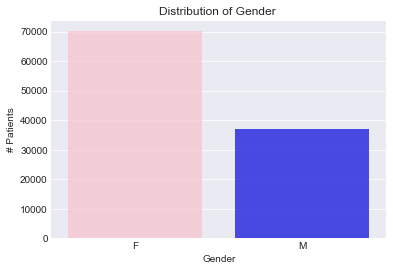

In [20]:
#Set the aesthetic style of the plots.Foe womwn the color is pink and for man blue
sns.set_style('darkgrid')
sns.countplot(df['Gender'], alpha =.80, palette= ['pink','blue'])
plt.title('Distribution of Gender ')
plt.ylabel('# Patients')
plt.show()

We see  that women are predominantly present compared to men, but we do not have a percentage ratio in what could give the chart a clearer picture

In [21]:
#useng grpupby to count the values of the people trie by gender in a relationship whit the No-show .
print(df.groupby('Gender')['No-show'].value_counts(normalize = True))

Gender  No-show
F       No         0.796431
        Yes        0.203569
M       No         0.799143
        Yes        0.200857
Name: No-show, dtype: float64


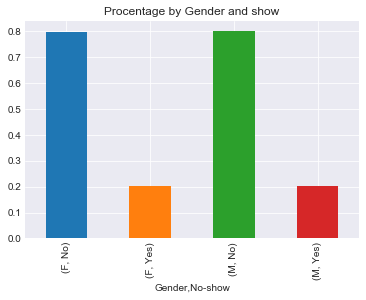

In [22]:
#now we whant tpo see using plot ,the visualisatoin of the raport between gender and no-sohw

df.groupby('Gender')['No-show'].value_counts(normalize = True).plot(kind='bar')
plt.title('Procentage by Gender and show')
plt.show()

We can see the women are most likely visit the hospitals than men this may due to several reasons : women take care about her health than men and also the pregnant woman usually visit the hospital several time during her pregnancy, and we may consider that the population mean for women is greater than mean in Brazil, but when we foucse on the (Show up) statuse we can see 79.6% of wamen attened to their appointment compared to 79.9% of men, so women and men are most likly to have the same rate of attendance.

### How is the age influencing the appoitments data?

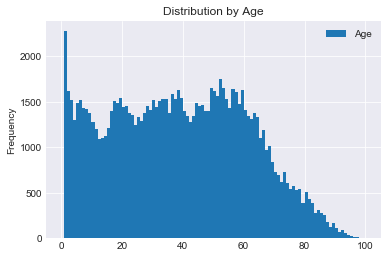

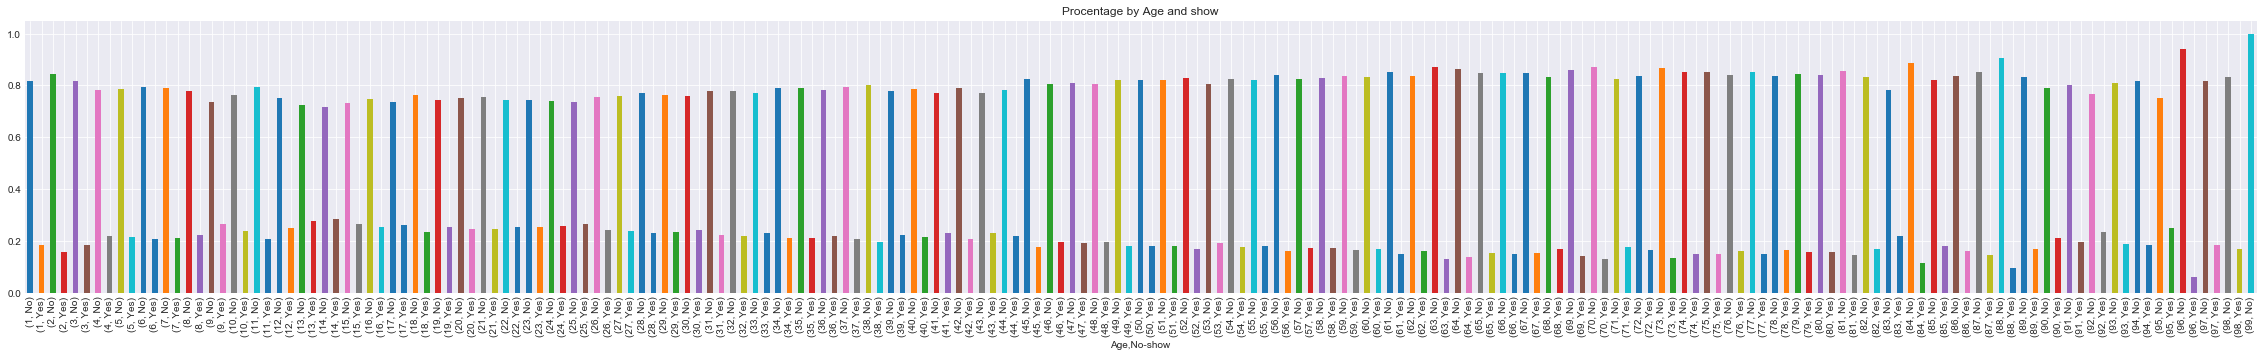

In [23]:
##Age Distribuation
df.plot(kind = "hist",y = "Age",bins =100,range= (0,100)) 
plt.title('Distribution by Age')
plt.show()

oringial_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (40,5)
df.groupby('Age')['No-show'].value_counts(normalize = True).plot(kind='bar')
plt.title('Procentage by Age and show')
plt.show()
plt.rcParams["figure.figsize"] = oringial_size

Wee can see that the patients just born hold a very important role in percentage of the appointments. This is shows the importance of medical service at the toddler age (Graph: Distribution by Age). Also from the "Presence by Age and show" graph wee can see that the number of the presence starts to increase steady in a relative direct proportion to the age. from 20 years onward the older the patient more likely is to show up on the appointment. 




### Dose the elderly woman take care about her health more than elderly man?




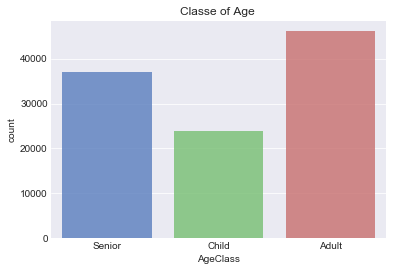

AgeClass  No-show
Adult     No         0.776539
          Yes        0.223461
Child     No         0.775252
          Yes        0.224748
Senior    No         0.837542
          Yes        0.162458
Name: No-show, dtype: float64


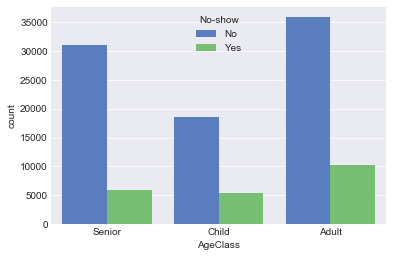

In [24]:
# number of patient according to thier aGE CLAss
sns.set_style('darkgrid')

sns.countplot(df['AgeClass'], alpha =.80,palette="muted")
plt.title('Classe of Age ')
plt.show()

print (df.groupby('AgeClass')['No-show'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='AgeClass', data=df,hue='No-show', palette="muted");
plt.show()

In [25]:
#do time series operations with the variables
pd.pivot_table(df,index=['AgeClass','No-show','Gender'],values=["Age"])

Age
AgeClass No-show Gender           
Adult    No      F       33.572489
                 M       34.514534
         Yes     F       32.584786
                 M       33.333793
Child    No      F        8.753021
                 M        7.659483
         Yes     F        9.609187
                 M        8.618356
Senior   No      F       63.419264
                 M       63.633761
         Yes     F       62.957364
                 M       62.999470

Most patients were between the age of 18 and 49 and the patients below 18 years has the minimum rate of visiting the hospital. However, when we see the show-up status we found patients above 50 years are most likely did not attend their appointment and also the gender did not play any role in this analysis.

In the appointment month it just includes 3 months!! on another hand the Scheduled month missed the months (7 to 10). However, in both diagrams, the most rate appointment was in may which is the end of Autumn in Brazile.

The patient tends to attend his appointment in the middle of the week, and no show up at the end of the week, especially in Thursday. If we focus on the waiting day and how the data is distribution we can see there is a drop in the appointment number after the three months of waiting especially for the group who not came to there appointments.

Text(0.5,1,'Scheduledmonth')

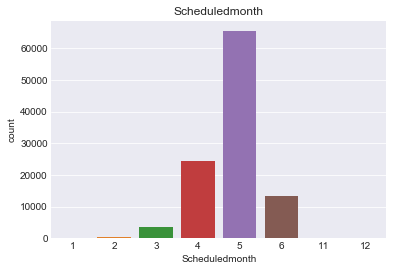

In [26]:
#Show value counts for a single categorical variable:
sns.countplot(df['Scheduledmonth'])
plt.title('Scheduledmonth')

 The Scheduled month missed the months (7 to 10). The most rate appointment is in May which is the end of Autumn in Brazile.Missing activite in first and the last two months.

Text(0.5,1,'Appointmentmonth')

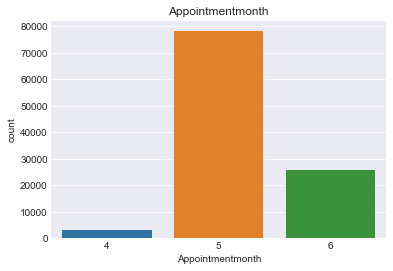

In [27]:
##Show value counts for a single categorical variable:
sns.countplot(df['Appointmentmonth'])
plt.title('Appointmentmonth')

In the appointment month it just includes 3 months!!The most rate appointment is in May which is the end of Autumn in Brazile.

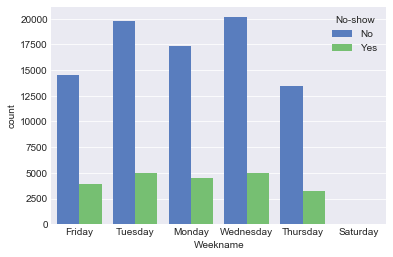

In [28]:
df["Weekname"] = df.AppointmentDay.dt.weekday_name
fig = sns.countplot(x='Weekname', data=df,hue='No-show', palette="muted");
plt.show()


We can see here the rate of appointments of the week days which is missing completing of the weekend !

In [29]:
df['WaitingDay'] = df['WaitingDay'].astype('timedelta64[D]')
print(df.WaitingDay.max())
print (df.WaitingDay.min())
## delete the nagative values
##check the nigative valuues 
#Patient.loc[df['WaitingDay']<0]
df=df[df.WaitingDay>=0]

178.0
-7.0


### What is the distribution based on the waiting days?

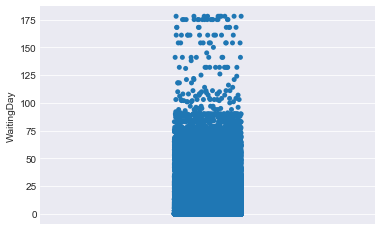

In [30]:

sns.stripplot(y="WaitingDay",data=df, jitter=True)

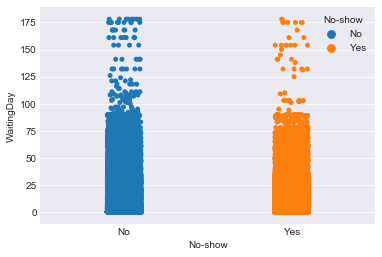

In [31]:
sns.stripplot(x="No-show" ,y="WaitingDay",hue="No-show",data=df, jitter=True)

The patient tends to attend his appointment in the middle of the week, and no show up at the end of the week, especially in Thursday. If we focus on the waiting day and how the data is distribution we can see there is a drop in the appointment number after the three months of waiting especially for the group who not came to there appointments.

### How the Sms reminder and handicap variables affect the attendance?

In [32]:
print(df["Handcap"].value_counts())
print(df.groupby('Handcap')['No-show'].value_counts(normalize = True))

0    104739
1      2033
2       183
3        13
4         3
Name: Handcap, dtype: int64
Handcap  No-show
0        No         0.796924
         Yes        0.203076
1        No         0.822430
         Yes        0.177570
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: No-show, dtype: float64


We can notice that the higher the handicap value the more likely is for the patient to miss the appointment. 

In [33]:
print(df["SMS_received"].value_counts())

print(df.groupby('SMS_received')['No-show'].value_counts(normalize = True))

0    72388
1    34583
Name: SMS_received, dtype: int64
SMS_received  No-show
0             No         0.832790
              Yes        0.167210
1             No         0.723332
              Yes        0.276668
Name: No-show, dtype: float64


We can notice that base on the revived sms the data sows a distribution contrary to the expectation. Once the sms is revived the more likely is for the patient to miss his appointment.

<a id='conclusions'></a>
### Conclusions

I try to identify how each variable in the dataset could affect the patient show up status and I found the adult patient tend to came to their appointment more than other ages also the patient are more likely to show up in middle of week more than the start of week and finally I built a predictive model to predict the patient who no show up, However there a lot to do to explore more variables in this data set and also the predictive model need to optimize.

#### Limitations
Even if I was able to extract some very intresting conclusions from the available dataset this analise has his limitations. One of them that I find particulary intristing is the "sms recived" data. As stated above, once the sms is revived the more likely is for the patient to miss his appointment. Probably this distribution is related to some other correlation related to patient persona life stile but for the moment this is a clear limitation on what type of insight we can take based on the available data



## Used resources
- Wikipedia: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/
- Udacity course material
- Qminder: https://www.qminder.com/no-shows-affect-hospitals/
- Stack Overflow: https://stackoverflow.com/